In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import  XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix 
import joblib
import warnings
warnings.filterwarnings("ignore")

2025-07-24 23:41:07.547737: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-24 23:41:07.550672: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-24 23:41:07.599577: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-24 23:41:07.599624: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-24 23:41:07.599647: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
df = pd.read_csv("../Obesity prediction.csv")
df.shape

(2111, 17)

In [3]:
df.head().T

0                      1  \
Gender                         Female                 Female   
Age                              21.0                   21.0   
Height                           1.62                   1.52   
Weight                           64.0                   56.0   
family_history                    yes                    yes   
FAVC                               no                     no   
FCVC                              2.0                    3.0   
NCP                               3.0                    3.0   
CAEC                        Sometimes              Sometimes   
SMOKE                              no                    yes   
CH2O                              2.0                    3.0   
SCC                                no                    yes   
FAF                               0.0                    3.0   
TUE                               1.0                    0.0   
CALC                               no              Sometimes   
MTRANS          Public_Transportation  Public_Transportation   
Obesity                 Normal_Weight          Normal_Weight   

                                    2                   3  \
Gender                           Male                Male   
Age                              23.0                27.0   
Height                            1.8                 1.8   
Weight                           77.0                87.0   
family_history                    yes                  no   
FAVC                               no                  no   
FCVC                              2.0                 3.0   
NCP                               3.0                 3.0   
CAEC                        Sometimes           Sometimes   
SMOKE                              no                  no   
CH2O                              2.0                 2.0   
SCC                                no                  no   
FAF                               2.0                 2.0   
TUE                               1.0                 0.0   
CALC                       Frequently          Frequently   
MTRANS          Public_Transportation             Walking   
Obesity                 Normal_Weight  Overweight_Level_I   

                                    4  
Gender                           Male  
Age                              22.0  
Height                           1.78  
Weight                           89.8  
family_history                     no  
FAVC                               no  
FCVC                              2.0  
NCP                               1.0  
CAEC                        Sometimes  
SMOKE                              no  
CH2O                              2.0  
SCC                                no  
FAF                               0.0  
TUE                               0.0  
CALC                        Sometimes  
MTRANS          Public_Transportation  
Obesity           Overweight_Level_II

In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [6]:
df.isna().sum().sum()

0

In [7]:
df.duplicated().sum()

24

In [8]:
df.drop_duplicates(inplace= True)

In [9]:
summary = df.describe().T
summary["IQR"] = summary["75%"]-summary["25%"]
summary["LowerBound"] = summary["25%"] - (1.5*summary["IQR"])
summary["UpperBound"] = summary["75%"] + (1.5*summary['IQR'])
summary["have_outliers"] = (summary["LowerBound"] > summary["min"]) | (summary["UpperBound"] < summary["max"])

summary

count       mean        std    min        25%        50%         75%  \
Age     2087.0  24.353090   6.368801  14.00  19.915937  22.847618   26.000000   
Height  2087.0   1.702674   0.093186   1.45   1.630178   1.701584    1.769491   
Weight  2087.0  86.858730  26.190847  39.00  66.000000  83.101100  108.015907   
FCVC    2087.0   2.421466   0.534737   1.00   2.000000   2.396265    3.000000   
NCP     2087.0   2.701179   0.764614   1.00   2.697467   3.000000    3.000000   
CH2O    2087.0   2.004749   0.608284   1.00   1.590922   2.000000    2.466193   
FAF     2087.0   1.012812   0.853475   0.00   0.124505   1.000000    1.678102   
TUE     2087.0   0.663035   0.608153   0.00   0.000000   0.630866    1.000000   

           max        IQR  LowerBound  UpperBound  have_outliers  
Age      61.00   6.084063   10.789844   35.126094           True  
Height    1.98   0.139313    1.421209    1.978461           True  
Weight  173.00  42.015907    2.976140  171.039767           True  
FCVC      3.00   1.000000    0.500000    4.500000          False  
NCP       4.00   0.302533    2.243667    3.453799           True  
CH2O      3.00   0.875271    0.278015    3.779099          False  
FAF       3.00   1.553597   -2.205890    4.008497          False  
TUE       2.00   1.000000   -1.500000    2.500000          False

In [10]:
# for col in ['Age', 'Height', 'Weight','NCP']:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower = q1 - 1.5 * iqr
#     upper = q3 + 1.5 * iqr
#     df = df[(df[col] >= lower) & (df[col] <= upper)]

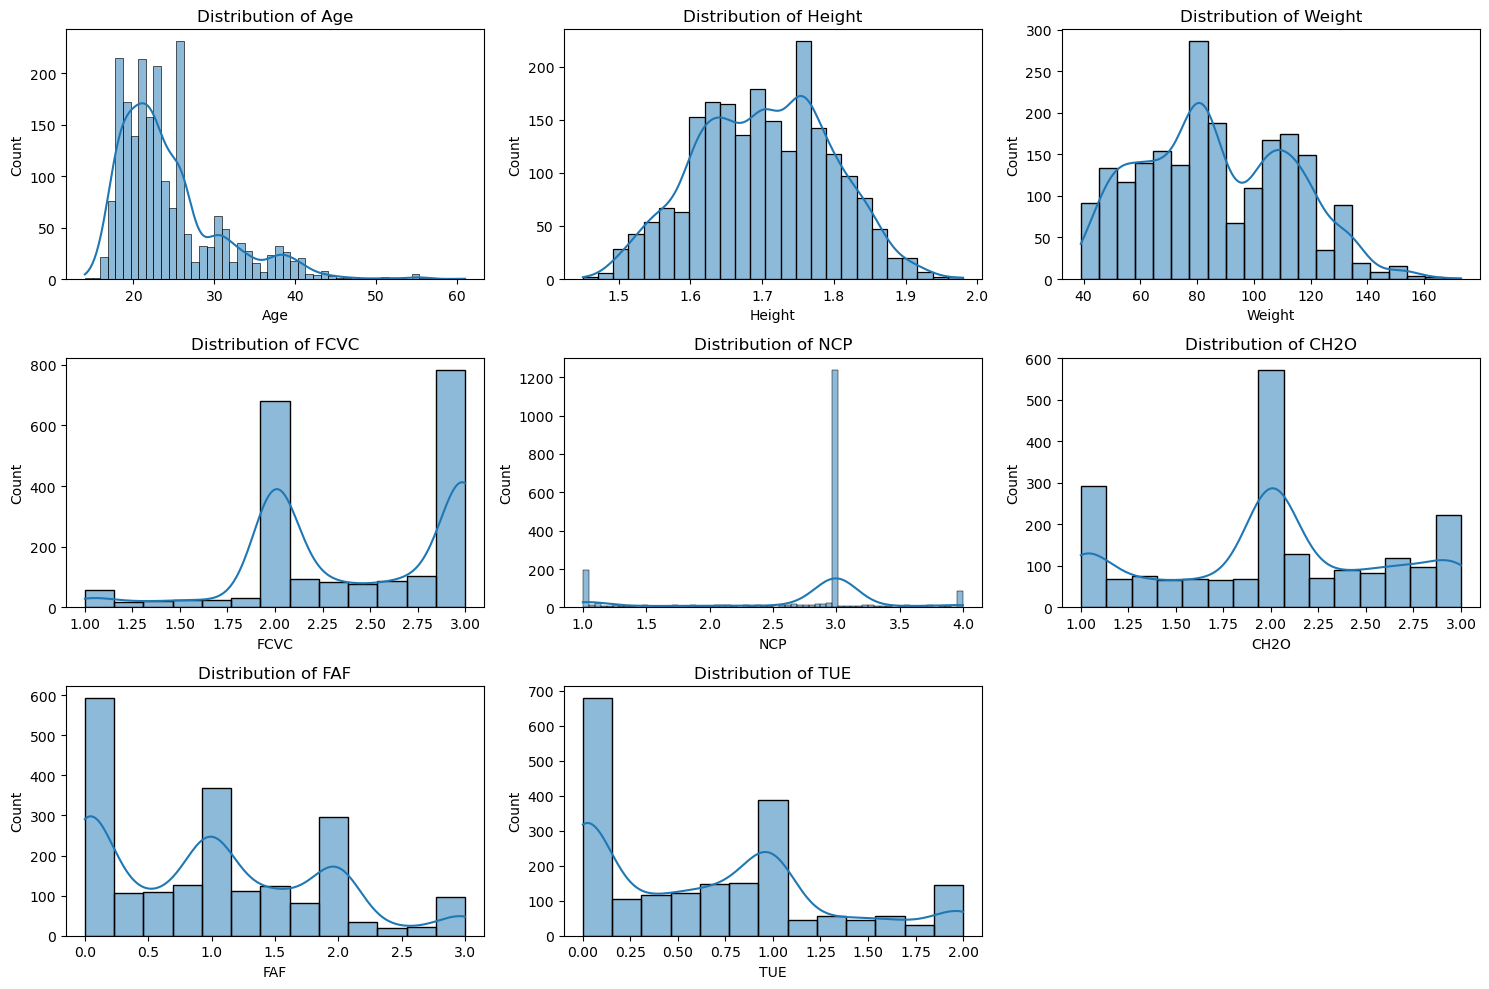

In [11]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

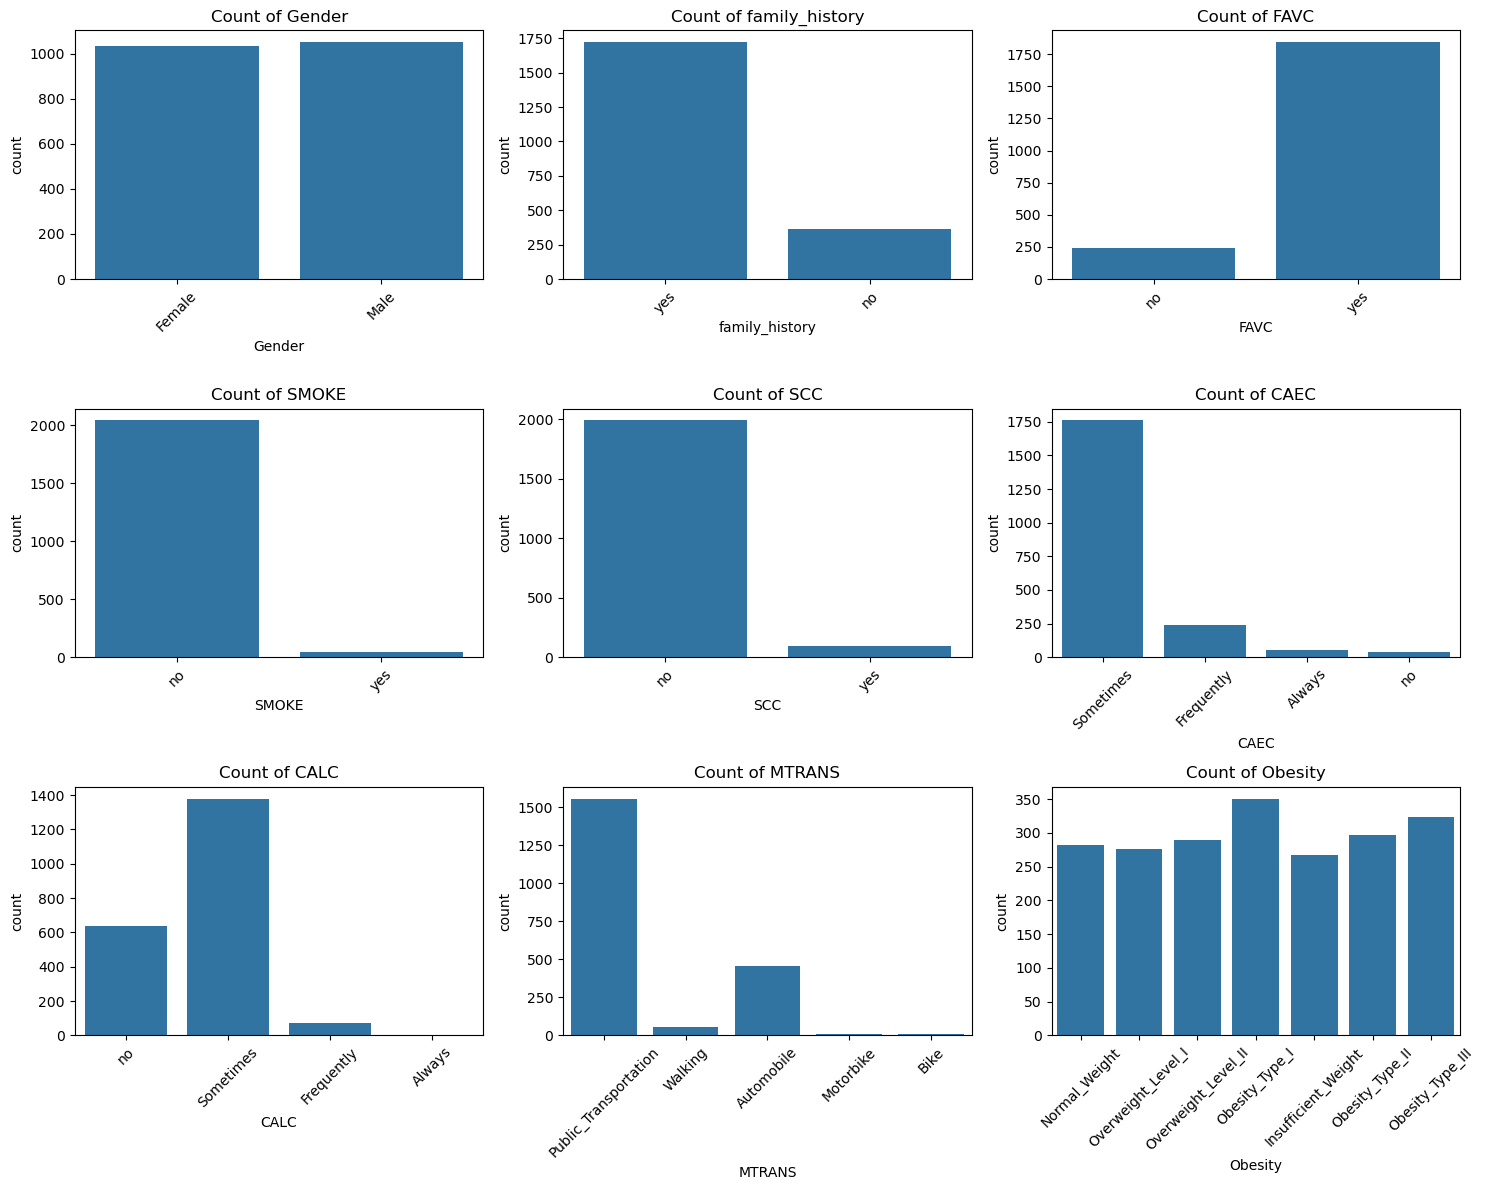

In [12]:
categorical_cols = ['Gender', 'family_history', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC', 'MTRANS', 'Obesity']
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

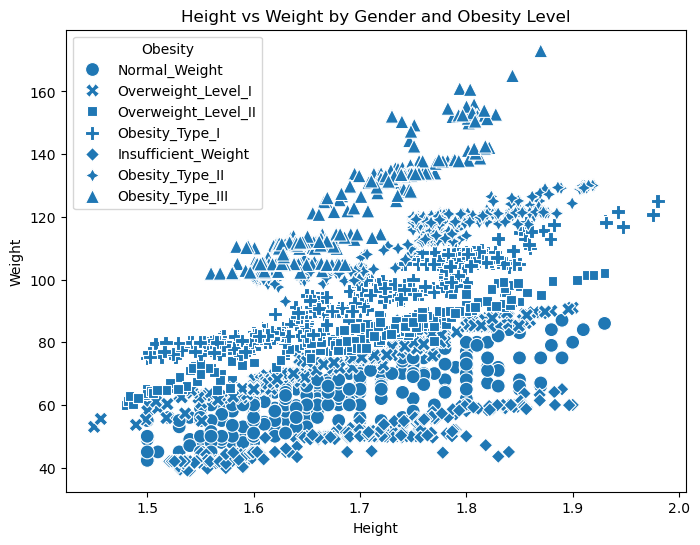

In [13]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Weight', style='Obesity', s=100)
plt.title('Height vs Weight by Gender and Obesity Level')
plt.show()

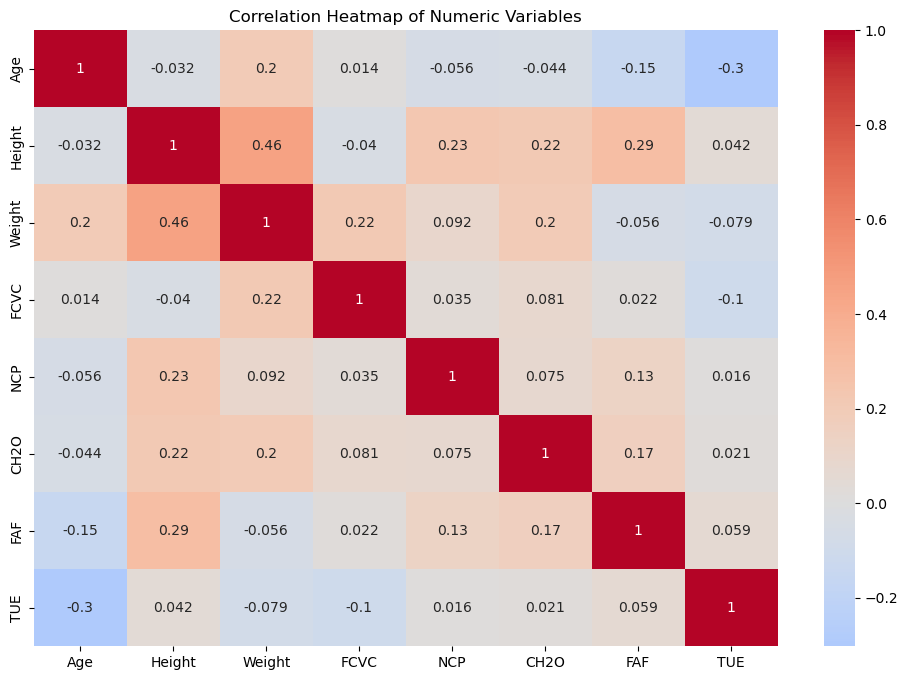

In [14]:
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

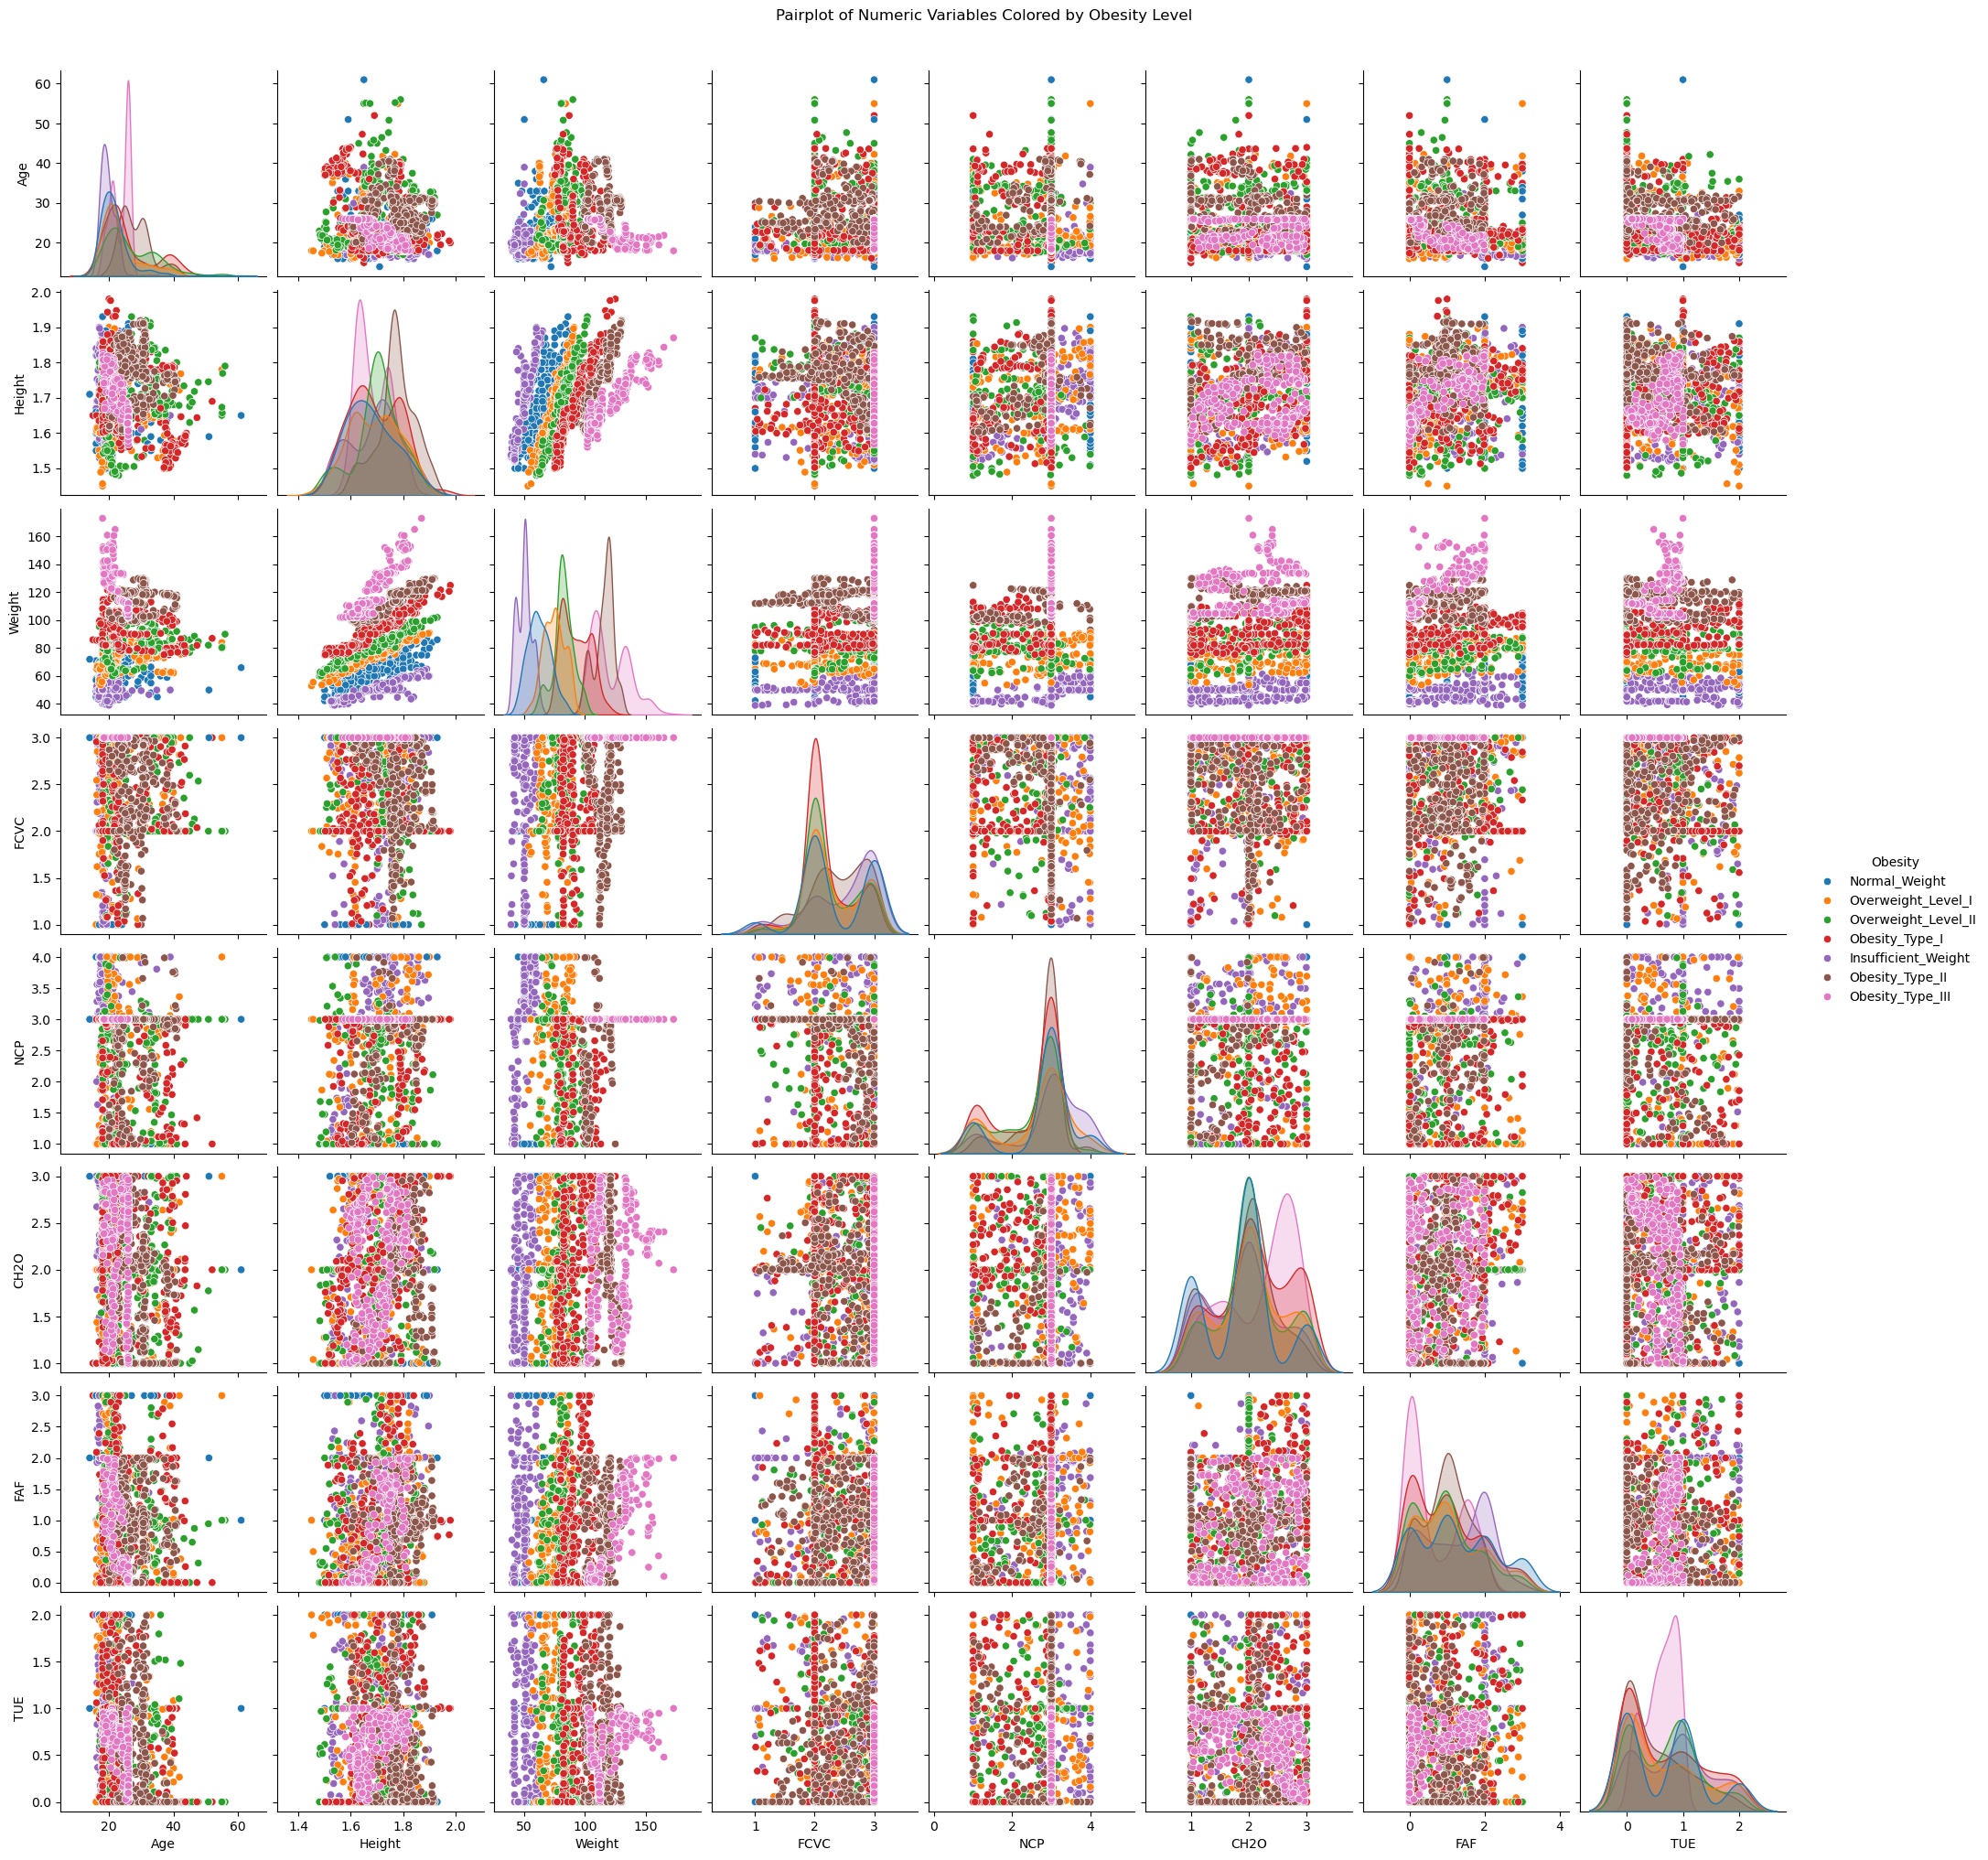

In [15]:
sns.pairplot(df[numeric_cols + ['Obesity']], hue='Obesity')
plt.suptitle('Pairplot of Numeric Variables Colored by Obesity Level', y=1.02)
plt.show()

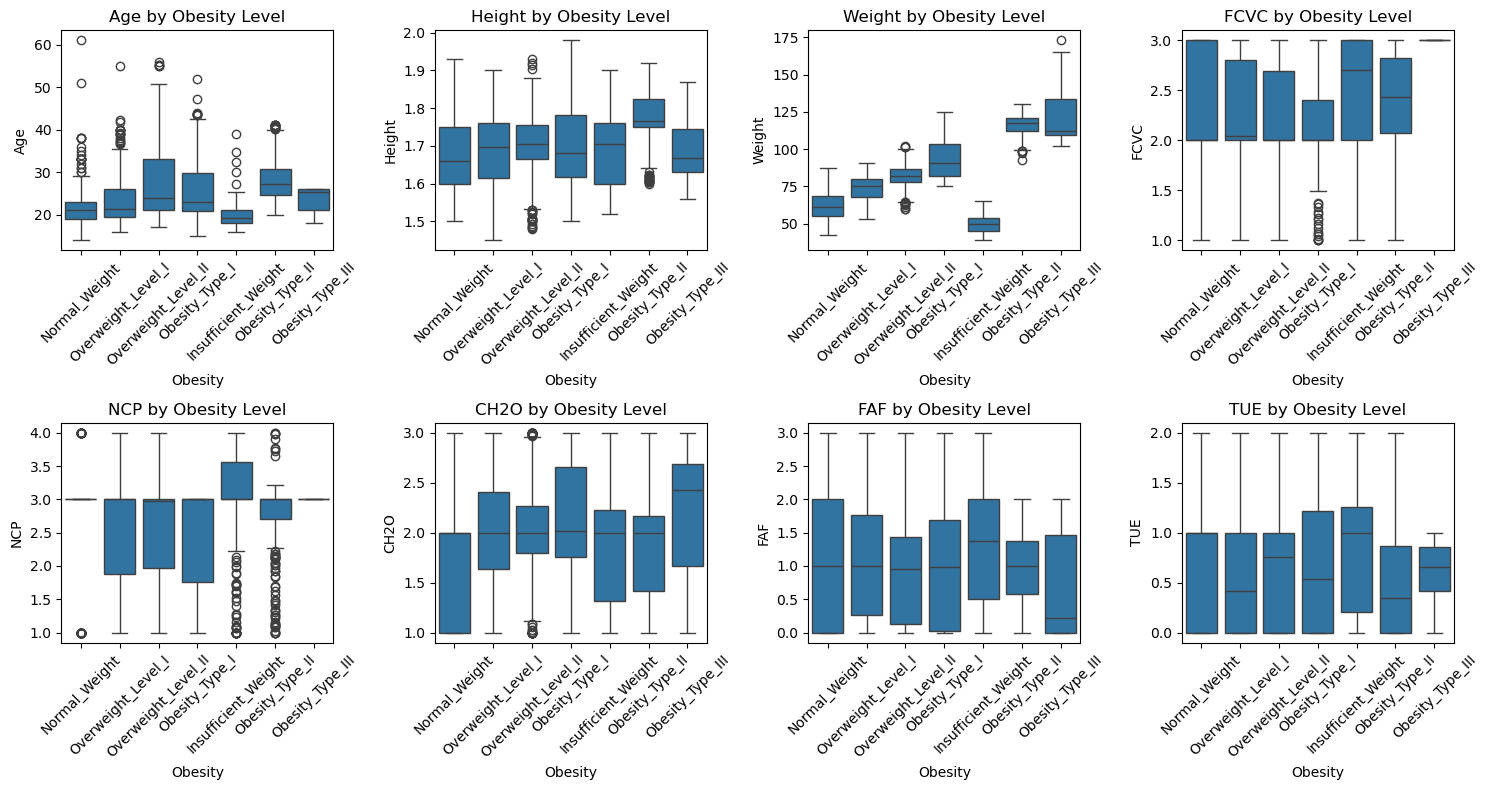

In [16]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x='Obesity', y=col)
    plt.title(f'{col} by Obesity Level')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS', 'Obesity'],
      dtype='object')


In [18]:
for column in categorical_columns:
    print(f"{column} : {df[column].unique()}")

Gender : ['Female' 'Male']
family_history : ['yes' 'no']
FAVC : ['no' 'yes']
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Obesity : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [19]:
map_y_n = {'yes':1 , 'no':0}

df["Gender"] = df["Gender"].map({'Male':0, 'Female':1})
columns_has_yn = ["SMOKE","SCC","FAVC","family_history"]
for column in columns_has_yn:
    df[column] = df[column].map(map_y_n)

In [20]:
le = LabelEncoder()
df["Obesity"] = le.fit_transform(df["Obesity"])
df["Obesity"].value_counts()

Obesity
2    351
4    324
3    297
6    290
1    282
5    276
0    267
Name: count, dtype: int64

In [21]:
columns_map = ['CAEC', 'CALC']
map_calc = {"no":0,
       "Sometimes":1,
       "Frequently":2,
       "Always":3}
for column in columns_map:
    df[column] = df[column].map(map_calc)


df = pd.get_dummies(data=df,columns = ["MTRANS"], dtype=int, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        2087 non-null   int64  
 1   Age                           2087 non-null   float64
 2   Height                        2087 non-null   float64
 3   Weight                        2087 non-null   float64
 4   family_history                2087 non-null   int64  
 5   FAVC                          2087 non-null   int64  
 6   FCVC                          2087 non-null   float64
 7   NCP                           2087 non-null   float64
 8   CAEC                          2087 non-null   int64  
 9   SMOKE                         2087 non-null   int64  
 10  CH2O                          2087 non-null   float64
 11  SCC                           2087 non-null   int64  
 12  FAF                           2087 non-null   float64
 13  TUE     

In [22]:
X = df.drop("Obesity",axis=1, inplace = False)
y = df["Obesity"]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1669, 19) (418, 19) (1669,) (418,)


In [24]:
classifiers = {
    "SVC":SVC(),
    "LR":LogisticRegression(),
    "XGBoost":XGBClassifier(),
    "RandomForest":RandomForestClassifier(),
    "DT" : DecisionTreeClassifier()
}

In [25]:
for name, model in classifiers.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"💠{name}:")
    print("accuracy : ",accuracy_score(y_test,y_pred))
    print(f"classification_report:\n{classification_report(y_test,y_pred)}")

💠SVC:
accuracy :  0.5741626794258373
classification_report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.76        59
           1       0.38      0.30      0.33        61
           2       0.52      0.39      0.44        70
           3       0.91      0.61      0.73        64
           4       0.67      0.87      0.75        60
           5       0.56      0.35      0.43        55
           6       0.39      0.65      0.48        49

    accuracy                           0.57       418
   macro avg       0.58      0.58      0.56       418
weighted avg       0.59      0.57      0.56       418

💠LR:
accuracy :  0.6555023923444976
classification_report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        59
           1       0.51      0.44      0.47        61
           2       0.60      0.56      0.58        70
           3       0.90      0.88      0.89        64
           4 

In [26]:
XGBoost = XGBClassifier()

XGBoost.fit(X_train,y_train)

y_pred = XGBoost.predict(X_test)

print("💠XGBoost:")
print("accuracy : ",accuracy_score(y_test,y_pred))
print(f"classification_report:\n{classification_report(y_test,y_pred)}")

💠XGBoost:
accuracy :  0.9760765550239234
classification_report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.92      0.93      0.93        61
           2       1.00      0.99      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.96      0.96      0.96        55
           6       0.98      1.00      0.99        49

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



In [32]:
joblib.dump(XGBoost, "Obesity_prediction_model.joblib") 

['Obesity_prediction_model.joblib']

In [27]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[56,  3,  0,  0,  0,  0,  0],
       [ 2, 57,  0,  0,  0,  2,  0],
       [ 0,  0, 69,  0,  0,  0,  1],
       [ 0,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0],
       [ 0,  2,  0,  0,  0, 53,  0],
       [ 0,  0,  0,  0,  0,  0, 49]])

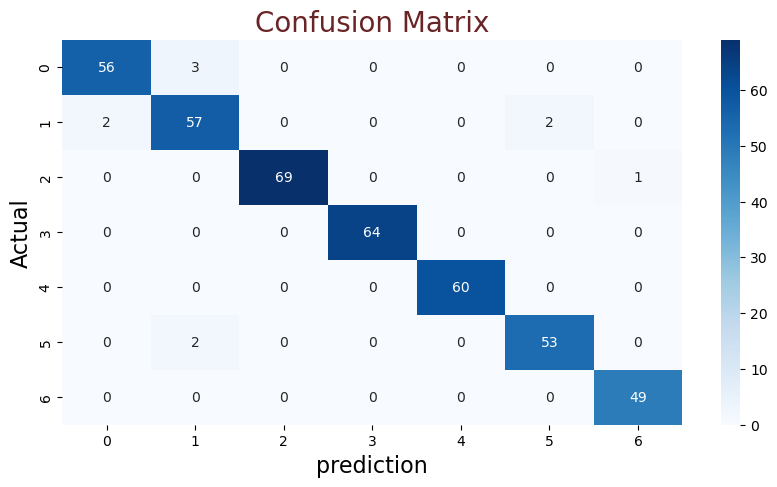

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(cm , annot=True, cmap="Blues")
plt.title("Confusion Matrix" ,fontsize=20,color='#692426',  fontname="DejaVu Sans" )
plt.xlabel("prediction", fontsize=16,  fontname="DejaVu Sans")
plt.ylabel("Actual", fontsize=16,  fontname="DejaVu Sans")
plt.show()

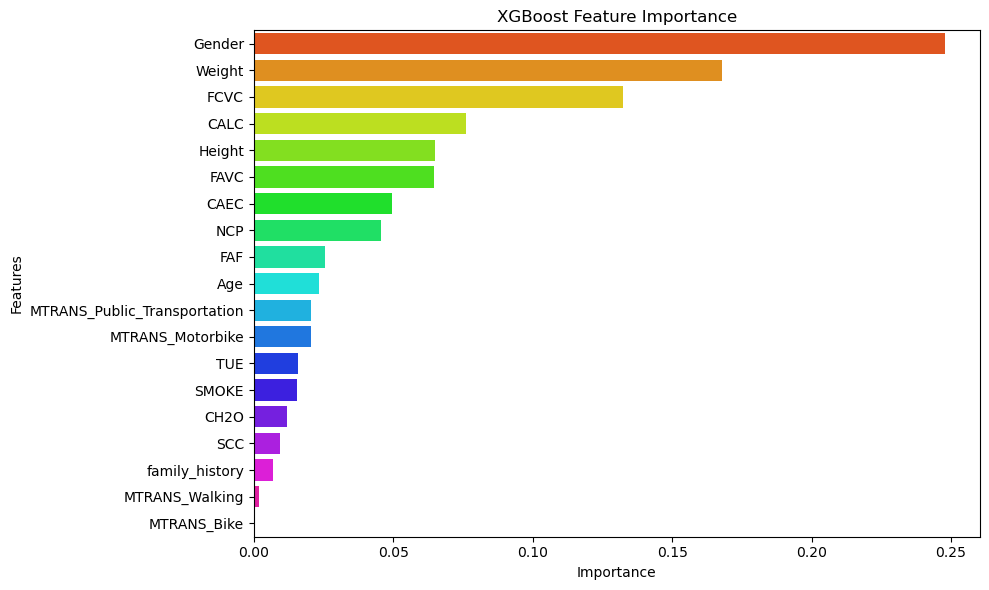

In [30]:

feature_importance = XGBoost.feature_importances_
feature_names = X.columns


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

num_features = importance_df.shape[0]
rainbow_colors = sns.color_palette("hsv", num_features)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df , palette=rainbow_colors)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()
     